Javier Mencia Ledo 1008476114

Part I

For part I, we will be using a dataset about the players in the 2022-2023 La Liga season, Spain's major soccer league.

(array([  1.,   0.,   0.,   1.,  48., 142., 204., 109.,  31.,   6.]),
 array([4.63, 4.92, 5.21, 5.5 , 5.79, 6.08, 6.37, 6.66, 6.95, 7.24, 7.53]),
 <BarContainer object of 10 artists>)

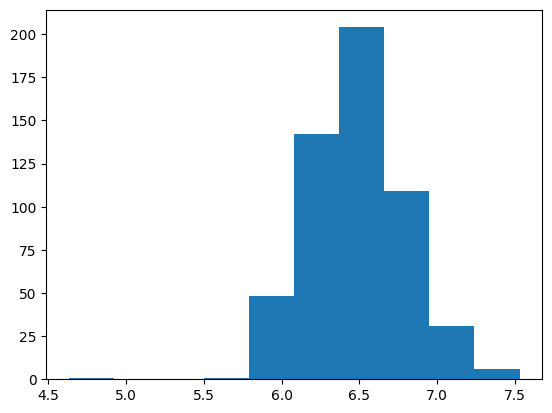

In [53]:
#Data import
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/javmencia/STA365javierMencia/main/laliga.csv'
data = pd.read_csv(url, on_bad_lines='skip')

data = data.fillna(0)
plt.hist(data["Rating"])


We see that the Rating column seems to follow a normal distribution centered at about 6.5, with the exception of an outlier between 4.5 and 5.0

In [42]:
import pymc as pm; import numpy as np
#n,p=len(y[0]),len(X[0])#; X,y=np.zeros((n,p)),np.ones((n,1))

y = [[i/10] for i in (list(data["Rating"]))]
X = np.column_stack((np.ones(len(y)),data["SPG"],data["Goals"], data["Assist"], data["YC"], data["RC"]))
n,p=len(y), len(X[0])

with pm.Model() as MLR:
    betas = pm.MvNormal('betas', mu=np.ones((p,1)), cov=np.eye(p), shape=(p,1))
    sigma = pm.Gamma('sigma', alpha=2, beta=1)
    y = pm.Normal('y', mu=pm.math.dot(X, betas), sigma=sigma, observed=y)

with MLR:
    idata = pm.sample(chains = 4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.63,0.0,0.63,0.63,0.0,0.0,5141.52,2876.11,1.0
"betas[0, 1]",0.63,0.0,0.63,0.63,0.0,0.0,5804.14,3616.71,1.0
"betas[0, 2]",0.63,0.0,0.63,0.63,0.0,0.0,5118.98,2600.67,1.0
"betas[0, 3]",0.63,0.0,0.63,0.63,0.0,0.0,5770.49,2957.94,1.0
"betas[0, 4]",0.63,0.0,0.63,0.63,0.0,0.0,5597.88,3299.56,1.0
"betas[0, 5]",0.63,0.0,0.63,0.63,0.0,0.0,5359.00,3467.62,1.0
"betas[1, 0]",0.01,0.0,0.00,0.01,0.0,0.0,5452.73,3068.48,1.0
"betas[1, 1]",0.01,0.0,0.00,0.01,0.0,0.0,5608.34,3516.17,1.0
"betas[1, 2]",0.01,0.0,0.00,0.01,0.0,0.0,5197.63,3182.54,1.0
"betas[1, 3]",0.01,0.0,0.00,0.01,0.0,0.0,5199.47,3262.31,1.0


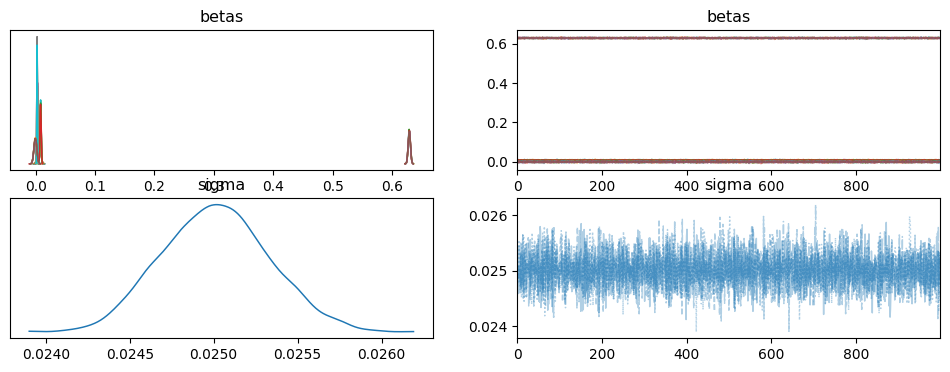

In [43]:
import arviz as az
az.plot_trace(idata, combined=True);
az.summary(idata, round_to=2)



Part II

Here is the link to part II:
https://github.com/javmencia/STA365javierMencia/blob/main/HW5Q2.pdf  

Part III

0 0 0


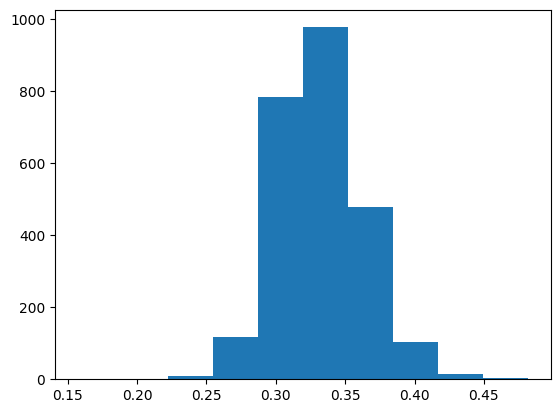

In [84]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/javmencia/STA365javierMencia/main/baseball_hitting.csv'
data = pd.read_csv(url, on_bad_lines='skip')
data.dropna(inplace = True)

#Preparing predictors:
data["Hits_comp"] = (data["Hits"]-np.mean(data["Hits"])) /np.var(data["Hits"])


print(data["AVG"].isna().sum(), data["Slugging Percentage"].isna().sum(), data["On-base Percentage"].isna().sum())
plt.hist(data["On-base Percentage"])
plt.show()



#data = data[["AVG", "Hits_comp", "On-base Percentage", "Slugging Percentage"]]
#y = np.array([[i] for i in data["AVG"]]).reshape(-1, 1)
#X = np.column_stack((data["On-base Percentage"], data["At-bat"]))


In [85]:
y = [[i] for i in (list(data["On-base Percentage"]))]
X = np.column_stack((data['Slugging Percentage'], data["AVG"]))
n,p=len(y), len(X[0])


In [75]:
import matplotlib.pyplot as plt

cov_matrix = np.cov(X, rowvar=False)
print(cov_matrix)
#Checking Matrix is positive definite
print(np.all(np.linalg.eigvals(cov_matrix) > 0))



[[0.00250631 0.00062405]
 [0.00062405 0.00061359]]
True


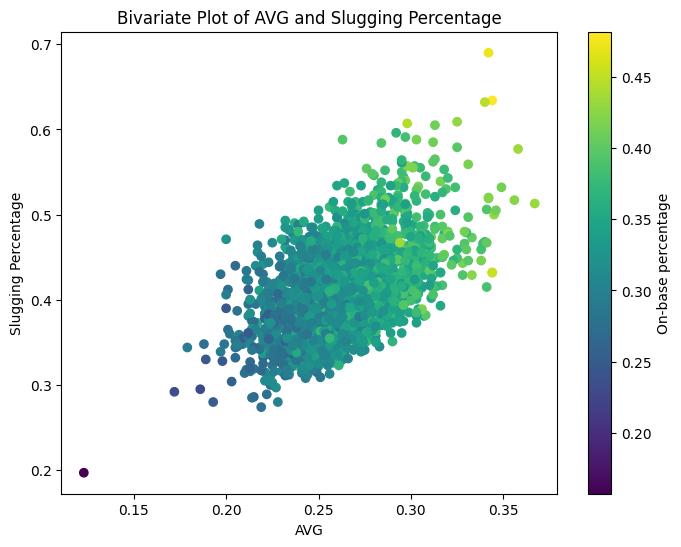

In [76]:
import matplotlib.pyplot as plt

# Extract the columns for the plot
x1 = data["AVG"]
x2 = data["Slugging Percentage"]
y = data["On-base Percentage"]

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, c=y, cmap='viridis')
plt.colorbar(label='On-base percentage')
plt.xlabel('AVG')
plt.ylabel('Slugging Percentage')
plt.title('Bivariate Plot of AVG and Slugging Percentage')
plt.show()


The predictors seem to follow a bivariate Gaussian distribution and the covariance matrix is positive definite, so we have reason to believe that the assumptions are satisfied and we can use Multinormal Linear Regression

In [78]:
import numpy as np
import pymc as pm

with pm.Model() as MNV_LKJ:
    packed_L = pm.LKJCholeskyCov("packed_L", n=p, eta=2.0,
                                 sd_dist=pm.LogNormal.dist(mu= 1, sigma = 1), compute_corr=False)
    L = pm.expand_packed_triangular(p, packed_L)
    # Sigma = pm.Deterministic('Sigma', L.dot(L.T)) # Don't use a covariance matrix parameterization
    mu = pm.MvNormal('mu', mu=np.array(0.5), cov=np.eye(p), shape=p);
    y = pm.MvNormal('y', mu=mu, chol=L, shape=(n,1), observed=data[['AVG', 'Slugging Percentage']].values)
    # Figure out how to parameterize this with a Cholesky factor to improve computational efficiency
with MNV_LKJ:
    idata = pm.sample()



/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

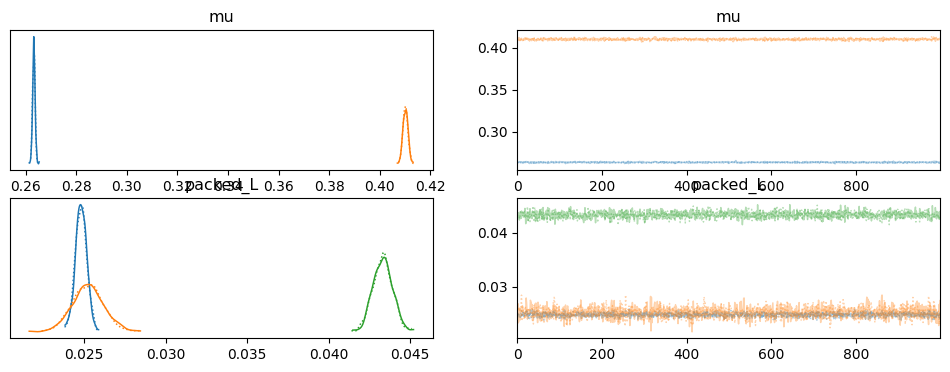

In [79]:
# Print summary statistics of the posterior distribution
pm.summary(idata)

# Plot posterior distributions of the coefficients
pm.plot_trace(idata)


Here we can see the results of the Cholesky decomposition approach, this is more computationally efficient than the covariance approach in the slides